<a href="https://colab.research.google.com/github/andremarinho17/data_analytics_projects_en/blob/main/Activity_Hypothesis_testing_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity: Hypothesis testing with Python

## Applying advanced hypothesis testing for a marketing campaign

<p align="center"><img src="https://img.freepik.com/vecteurs-premium/outbound-marketing-business-vector-illustration-conception-megaphone-pour-attirer-clients-hors-ligne-ligne-pour-web-affiche_2175-1722.jpg" >



**Author**: André Marinho Moreira

## **Introduction**


As you've been learning, analysis of variance (commonly called ANOVA) is a group of statistical techniques that test the difference of means among three or more groups. It's a powerful tool for determining whether population means are different across groups and for answering a wide range of business questions.

In this activity, you are a data professional working with historical marketing promotion data. You will use the data to run a one-way ANOVA and a post hoc ANOVA test. Then, you will communicate your results to stakeholders. These experiences will help you make more confident recommendations in a professional setting.

In your dataset, each row corresponds to an independent marketing promotion, where your business uses TV, social media, radio, and influencer promotions to increase sales. You have previously provided insights about how different promotion types affect sales; now stakeholders want to know if sales are significantly different among various TV and influencer promotion types.

To address this request, a one-way ANOVA test will enable you to determine if there is a statistically significant difference in sales among groups. This includes:
* Using plots and descriptive statistics to select a categorical independent variable
* Creating and fitting a linear regression model with the selected categorical independent variable
* Checking model assumptions
* Performing and interpreting a one-way ANOVA test
* Comparing pairs of groups using an ANOVA post hoc test
* Interpreting model outputs and communicating the results to nontechnical stakeholders

## **Step 1: Imports**


Import pandas, pyplot from matplotlib, seaborn, api from statsmodels, ols from statsmodels.formula.api, and pairwise_tukeyhsd from statsmodels.stats.multicomp.

In [ ]:
# Import libraries and packages.

# Import pandas, matplotlib and seaborn packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import statsmodels and ols function
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Import Tukey's HSD function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

`Pandas` was used to load the dataset `marketing_sales_data.csv` as `data`, now display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [ ]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ###
df = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows.
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


The features in the data are:
* TV promotion budget (in Low, Medium, and High categories)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in Mega, Macro, Nano, and Micro categories)

**Question:** Why is it useful to perform exploratory data analysis before constructing a linear regression model?

Performing EDA before constructing a linear regression model is important because it allows us to better understand the patterns of the data, such as the relationship of the variables, how they vary, and other important patterns in order to construct a good model.

## **Step 2: Data exploration**


First, use a boxplot to determine how `Sales` vary based on the `TV` promotion budget category.

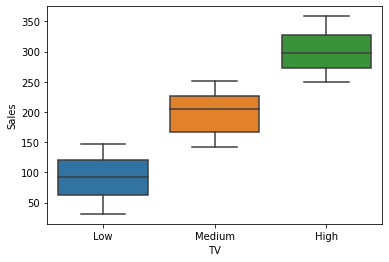

In [ ]:
# Create a boxplot with TV and Sales.

sns.boxplot(x='TV', y='Sales', data=df)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is a function in the `seaborn` library that creates a boxplot showing the distribution of a variable across multiple groups.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `boxplot()` function from `seaborn`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `TV` as the `x` argument, `Sales` as the `y` argument, and `data` as the `data` argument.

</details>

**Question:** Is there variation in `Sales` based off the `TV` promotion budget?

The boxplot shows that there is a significant variation in Sales based on the TV promotion budget. The bigger the budget, the bigger the sales.

Now, use a boxplot to determine how `Sales` vary based on the `Influencer` size category.

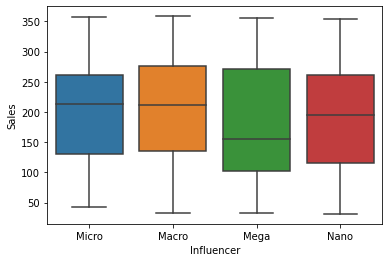

In [ ]:
# Create a boxplot with Influencer and Sales.

sns.boxplot(x = 'Influencer', y='Sales', data=df)

**Question:** Is there variation in `Sales` based off the `Influencer` size?

The boxplot shows that there isn't a significant variation in Sales based on the Influencer size.

### Remove missing data

You may recall from prior labs that this dataset contains rows with missing values. To correct this, drop these rows. Then, confirm the data contains no missing values.

In [ ]:
# Drop rows that contain missing data and update the DataFrame.

df = df.dropna(axis=0)

# Confirm the data contains no missing values.

df.isnull().sum(axis=0)

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is a `pandas` function that removes missing values.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `dropna()` function removes missing values from an object (e.g., DataFrame).

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Verify the data is updated properly after the rows containing missing data are dropped.

</details>

## **Step 3: Model building**


Fit a linear regression model that predicts `Sales` using one of the independent categorical variables in `data`. Refer to your previous code for defining and fitting a linear regression model.

In [ ]:
# Define the OLS formula.

ols_formula = 'Sales ~ C(TV)'

# Create an OLS model.

OLS = ols(formula = ols_formula, data = df)

# Fit the model.

model = OLS.fit()

# Save the results summary.

model_summary = model.summary()

# Display the model results.

model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Mon, 09 Dec 2024   Prob (F-statistic):          8.81e-256
Time:                        12:33:39   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to code you've written to fit linear regression models.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `ols()` function from `statsmodels.formula.api`, which creates a model from a formula and DataFrame, to create an OLS model.

</details>


<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `C()` around the variable name in the ols formula to indicate a variable is categorical.
    
Be sure the variable string names exactly match the column names in `data`.

</details>

**Question:** Which categorical variable did you choose for the model? Why?

The categorial variable selected for the model was TV because it has a great relationship with average Sales, unlike the Influencer variable, which doesn't have a significant relationship with Sales.

### Check model assumptions

Now, check the four linear regression assumptions are upheld for your model.

**Question:** Is the linearity assumption met?

Yes. As the Sales and TV have a good and linear relationship, the linearity assumption is met.

The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (row) is independent of one another, the independence assumption is not violated.

Next, verify that the normality assumption is upheld for the model.

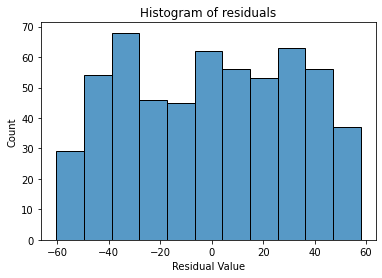

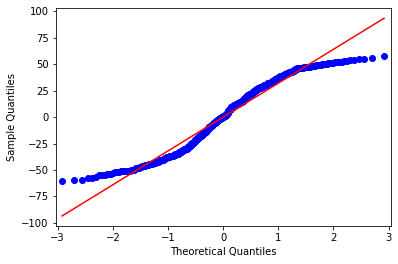

In [ ]:
# Calculate the residuals.

residuals = model.resid

# Create a histogram with the residuals.

fig = sns.histplot(residuals)
fig.set_xlabel('Residual Value')
fig.set_title('Histogram of residuals')
plt.show()

# Create a Q-Q plot of the residuals.

fig = sm.qqplot(residuals, line = 's')
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the residuals from the fit model object.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.resid` to get the residuals from a fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

For the histogram, pass the residuals as the first argument in the `seaborn` `histplot()` function.
    
For the QQ-plot, pass the residuals as the first argument in the `statsmodels` `qqplot()` function.

</details>

**Question:** Is the normality assumption met?

The q-q plot forms a s curve and deviates from the diagonal line, which is not what is expected to met the linearity assumption. However, for the purpose of this lab, as stated by the activity, this assumption will be assumed as met.

Now, verify the constant variance (homoscedasticity) assumption is met for this model.

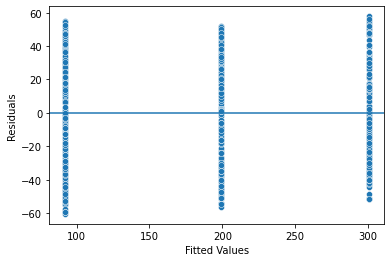

In [ ]:
# Create a scatter plot with the fitted values from the model and the residuals.

fig = sns.scatterplot(model.fittedvalues, residuals)
fig.axhline(0)
fig.set_xlabel('Fitted Values')
fig.set_ylabel('Residuals')
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the fitted values from the model object fit earlier.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.fittedvalues` to get the fitted values from the fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>


Call the `scatterplot()` function from the `seaborn` library and pass in the fitted values and residuals.
    
Add a line to a figure using the `axline()` function.

</details>

**Question:** Is the constant variance (homoscedasticity) assumption met?

The variance of the residuals appears to be consistent across the range of fitted values, confirming that the assumption of constant variance is met.

## **Step 4: Results and evaluation**

First, display the OLS regression results.

In [ ]:
# Display the model results summary.

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Mon, 09 Dec 2024   Prob (F-statistic):          8.81e-256
Time:                        12:53:50   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** What is your interpretation of the model's R-squared?

The OLS summary table shows the model has an R-squared of 0.874. This means that the investment in TV campaigns explains about 87% of the variance in sales.

**Question:** What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?

With `TV` as independent variable to predict sales, the coefficients are:
* B0: 300.5296
* B(Tv - Low): -208.8133
* B(Tv - Medium): -101.5061

The high budget for TV promotions is the reference point. On one hand, if Low and High TV promotions are compared, a low promotion can generate an average return of 208.82 less compared to a High promotion. On the other hand, if Medium and High promotions are compared, a Medium promotion can generate an average return of 101.51 less compared to a High promotion.

The coefficients are statistically significant, as the p-value is equal to 0.000 (< 0.05), with 95% of confidence. Therefore:
* There is a 95% chance that the true parameter of the slope of $\beta_{TVLow}$ falls between -215.353 and -202.274, which is the estimated difference in promotion sales when a `Low` `TV` promotion is chosen instead of a `High` `TV` promotion.
* There is a 95% chance that the true parameter of the slope of $\beta_{TVMedium}$ falls between -108.038 and -94.975, which is the estimated difference in promotion sales when a `Medium` `TV` promotion is chosen instead of a `High` `TV` promotion.

**Question:** Do you think your model could be improved? Why or why not? How?

The model could be improved with more granularity regarding the TV budget promotion. Other variables that could be important to improve the model would be the season of the year as well as the region of the marketing campaign.

### Perform a one-way ANOVA test

With the model fit, run a one-way ANOVA test to determine whether there is a statistically significant difference in `Sales` among groups.

In [ ]:
# Create an one-way ANOVA table for the fit model.

sm.stats.anova_lm(model, typ = 2)

,sum_sq,df,F,PR(>F)
C(TV),4.052692e+06,2.0,1971.455737,8.805550e-256
Residual,5.817589e+05,566.0,NaN,NaN


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Review what you've learned about how to perform a one-way ANOVA test.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

There is a function in `statsmodels.api` (i.e. `sm`) that peforms an ANOVA test for a fit linear model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `anova_lm()` function from `sm.stats`. Specify the type of ANOVA test (for example, one-way or two-way), using the `typ` parameter.
   

</details>

**Question:** What are the null and alternative hypotheses for the ANOVA test?

$$H_0: Sales_L=Sales_M=Sales_H$$

There is no difference in Sales based on TV promotion budget. (L = Low, M = Medium, H = High)

$$H_1: \text{Not } Sales_L=Sales_M=Sales_H$$

There is a difference in Sales based on TV promotion budget. (L = Low, M = Medium, H = High)

**Question:** What is your conclusion from the one-way ANOVA test?

The F-statistic is 1971.46 and the p-value is 8.805550e-256, which is way less than the p-value (0.05). This way, the null hypothesis, which states that there is no difference in sales based on the TV promotion budget, can be rejected in favor of the alternative hypothesis, which states that there is actually a difference in sales based on the TV promotion budget.

**Question:** What did the ANOVA test tell you?

The results of the one-way ANOVA show that there is a statistically significant difference in Sales among TV promotion budget groups.

### Perform an ANOVA post hoc test

If you have significant results from the one-way ANOVA test, you can apply ANOVA post hoc tests such as the Tukey’s HSD post hoc test.

Run the Tukey’s HSD post hoc test to compare if there is a significant difference between each pair of categories for TV.

In [ ]:
# Perform the Tukey's HSD post hoc test.

tukey_oneway = pairwise_tukeyhsd(endog = df['Sales'], groups = df['TV'], alpha = 0.05)

In [ ]:
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-208.8133,0.001,-216.637,-200.9896,True
High,Medium,-101.5061,0.001,-109.3204,-93.6918,True
Low,Medium,107.3072,0.001,99.7063,114.908,True


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Review what you've learned about how to perform a Tukey's HSD post hoc test.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `pairwise_tukeyhsd()` function from `statsmodels.stats.multicomp`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

The `endog` argument in `pairwise_tukeyhsd` indicates which variable is being compared across groups (i.e., `Sales`). The `groups` argument in `pairwise_tukeyhsd` tells the function which variable holds the group you’re interested in reviewing.

</details>

**Question:** What is your interpretation of the Tukey HSD test?

The first row indicates that there is a difference in sales between the high and low groups. The second row states that there is a difference in sales between the high and medium groups, while the third row shows that there is a difference in sales between the low and medium groups.

**Question:** What did the post hoc tell you?**

After conducting the one-way ANOVA, a post hoc test was used to explore the specific differences between TV groups. This approach goes beyond the general conclusion of ANOVA, which only indicates the presence of at least one significant difference among the groups. To address the risk of inflated error rates due to multiple comparisons, the Tukey HSD test was employed, ensuring more reliable identification of group differences.

The results of the Tukey HSD test indicate that Sales is different among the distinct pairs of TV promotional budget groups.

## **Considerations**

**What summary would you provide to stakeholders? Consider the statistical significance of key relationships and differences in distribution.**

High TV promotional budgets have a significant impact on sales, more than Medium and Low TV promotion budgets. In addition, Medium TV promotional budgets have more impact on sales than Low TV promotion budgets.

The one-way ANOVA resulted in an F-statistic of 1971.46 and a p-value of 8.805550e-256, which is way less than the p-value (0.05). This way, the null hypothesis, which states that there is no difference in sales based on the TV promotion budget, can be rejected in favor of the alternative hypothesis, which states that there is actually a difference in sales based on the TV promotion budget. Therefore, it can be concluded that there is a statistically significant difference in Sales among TV promotion budget groups.

The results of the post hoc Tukey HSD test indicated that:
* There is a statistically significant difference of \\$208.82 in sales between the High and Low TV promotion budgets, with a 95% confidence that this exact value falls between \\$200.98 and \\$216.63.
* There is a statistically significant difference of \\$101.51 in sales between the High and Medium TV promotion budgets, with a 95% confidence that this exact value falls between \\$93.69 and \\$109.32.
* There is a statistically significant difference of \\$107.30 in sales between the Medium and Low TV promotion budgets, with a 95% confidence that this exact value falls between \\$99.70 and \\$114.90.

The results from the linear regression model had an R-squared of 0.874. This means that the investment in TV campaigns explains about 87% of the variance in sales.

**Recommendations**

The analysis reveals the strong and statistically significant impact of TV promotion budgets on sales performance. Based on these findings, the following recommendations are made to optimize marketing strategies and budget allocation:

* **Prioritize High TV Promotion Budgets:** High TV promotion budgets have the most substantial impact on sales, resulting in an average increase of $208.82 compared to Low budgets. This demonstrates that scaling up TV promotion investments can significantly enhance sales outcomes. The company should consider allocating a greater portion of the marketing budget toward high-impact TV campaigns to maximize returns.

* **Strategically Utilize Medium Budgets:** Medium TV budgets also outperform Low budgets, with an average sales increase of $107.30. While not as impactful as High budgets, Medium budgets still provide meaningful sales growth. Medium budgets can be leveraged for periods where High budget allocations are not feasible, ensuring a balance between cost and effectiveness.

* **Limit the Use of Low TV Promotion Budgets:** Low TV budgets have the least impact on sales, making them a less efficient use of marketing funds. These should be minimized unless specific constraints or objectives necessitate their use.

* **Invest in Data-Driven Campaign Planning:** The R-squared value of 0.874 indicates that TV promotion budgets explain 87% of the variance in sales. This strong predictive power underscores the importance of leveraging data and analytical tools to fine-tune budget allocations and campaign strategies. Regularly evaluate the effectiveness of promotional efforts using similar statistical analyses to refine marketing strategies over time.

* **Explore Synergistic Channels:** While TV promotions are highly impactful, integrating them with other marketing channels (e.g., digital, social media) may yield complementary benefits, amplifying overall campaign effectiveness.

* **Monitor Return on Investment (ROI):** As TV campaigns require significant investment, closely monitor ROI to ensure that the incremental sales justify the higher spend. Focus on optimizing the cost-effectiveness of campaigns through targeted messaging and strategic scheduling.

Implementing these recommendations will enable the company to maximize the impact of its TV promotion budgets, achieve higher sales growth, and make data-driven decisions to sustain competitive advantage.

#### **Reference**
[Saragih, H.S. *Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.